# Let's See How Many Trees there are in the Forests

This notebook shows a subplot for each (dataset, forestType, variant) triple where

- dataset $\in$ {adult, wine-quality}
- forestType $\in$ {ET, RF}
- variant $\in$ {WithLeafEdges, NoLeafEdges}.

Each subplot shows a the number of frequent subtrees found or the maximum size of any such frequent subtree as a function of the frequency threshold in the forest database.

Here, a tree is frequent if it occurs as a rooted subtree in at least threshold many decision trees in the random forest.



### Input Data

These are the relevant lines producing the data processed in this notebook:

    echo "processing threshold ${threshold} for ${f}
    ./lwgr -e rootedTrees -m bfs -t ${threshold} -p 10 \
    -o forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.patterns 
    < ${f}
    > forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.features
    2> forests/rootedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.logs


In [2]:
import os
import matplotlib.pyplot as pl
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

## Plot Number of Frequent Subtrees

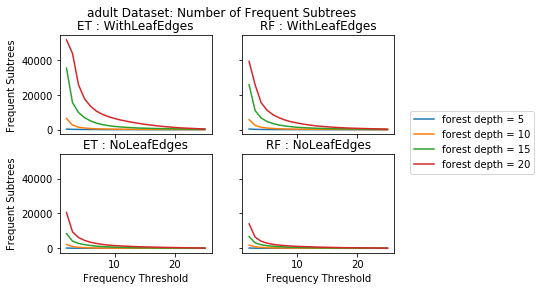

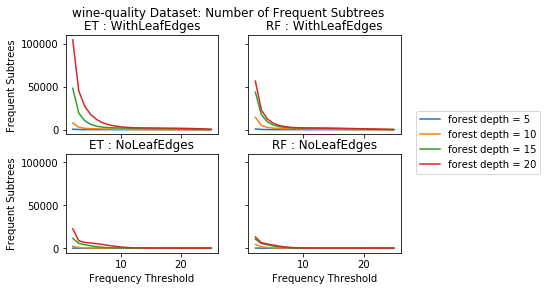

In [2]:
# plot number of frequent subtrees
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()            

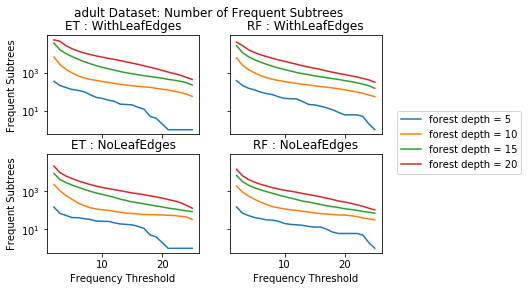

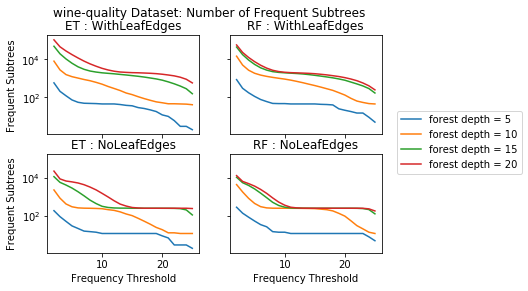

In [3]:
# plot number of frequent subtrees with log scale on yaxis
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
                subplot.set_yscale('log')
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

## Plot Maximum Pattern Size

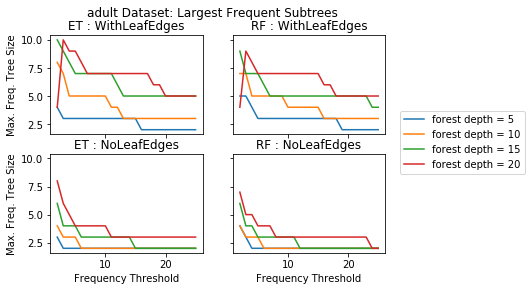

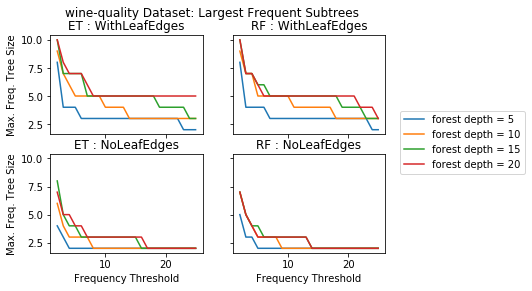

In [5]:
# plot number of vertices in largest frequent subtree
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Largest Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                    # parse log file
                    try:
                        f = open(filename)
                        value = 0

                        for line in f:
                            if line.startswith('Number of frequent vertices: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 1
                            if line.startswith('Number of frequent edges: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 2
                            if line.startswith('Processing patterns with '):
                                value = int(line.split(' ')[3])
                                fpFound = False
                            if line.startswith('frequent patterns: '):
                                if (int(line.split(': ')[1]) > 0):
                                    fpFound = True
                        # the log file contains information about the last level of patterns:
                        # either the algorithm stopped due to the max pattern size parameter
                        # or due to no frequent trees on that level.
                        # in the first case, the max pattern size is the last number parsed in the third if
                        # in the second case, the max pattern size is the last number parsed in the third if minus 1 
                        if (value > 2) and not fpFound:
                            value -= 1
                        f.close()
                    except:
                        print('Parsing error at ' + filename)
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Max. Freq. Tree Size')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

# Plot Patterns of Size 6

In [10]:
# plot patterns of a certain size
def plotSizeXPatterns(patternsize=5):
    for dataset in ['adult', 'wine-quality']:
        fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
        fig.suptitle(dataset + ' Dataset: Number of Frequent Rooted Subtrees of size 6')
        x = -1
        y = -1
        for variant in ['WithLeafEdges', 'NoLeafEdges']:
            x = (x + 1) % 2        
            for forestType in ['ET', 'RF']:
                y = (y + 1) % 2
                subplot = axes[x][y]
                for depth in ['5', '10', '15', '20']:
                    values = list()
                    for threshold in range(2, 26):
                        filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                                forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                        # parse log file
                        try:
                            f = open(filename)
                            value = 0
                            inSelectedLevel = False

                            for line in f:
                                if line.startswith('Processing patterns with ' + str(patternsize) + ' vertices'):
                                    inSelectedLevel = True
                                if inSelectedLevel:
                                    if line.startswith('frequent patterns: '):
                                        value  = int(line.split(': ')[1])
                                        break

                            f.close()
                        except:
                            print('Parsing error at ' + filename)
                            value = -1
                        values.append(value)

                    # plot it --- starting with patterns of frequency at least 3, as there were computation problems for t-2
                    subplot.plot(range(3, 26), values[1:], label='forest depth = ' + str(depth))
                    subplot.set_title(forestType + ' : ' + variant)

                if x == 1:
                    subplot.set_xlabel('Frequency Threshold')
                if y == 0:
                    subplot.set_ylabel('# size ' + str(patternsize) + ' Patterns')

        # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
        subplot.legend(loc=(1.1, 0.8))
        pl.show()


patterns of size 7


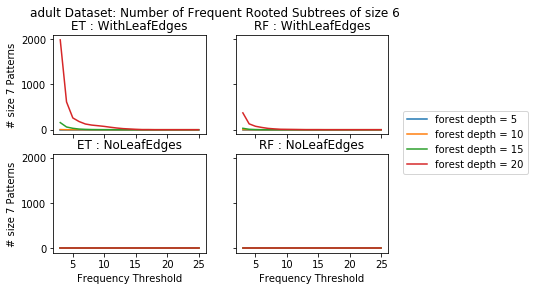

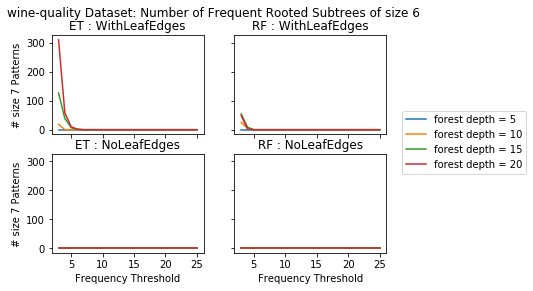

patterns of size 6


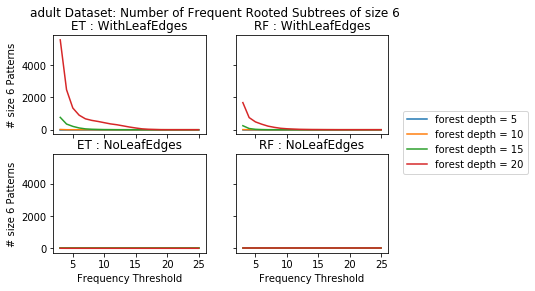

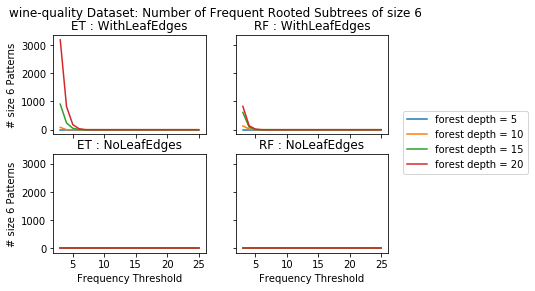

patterns of size 5


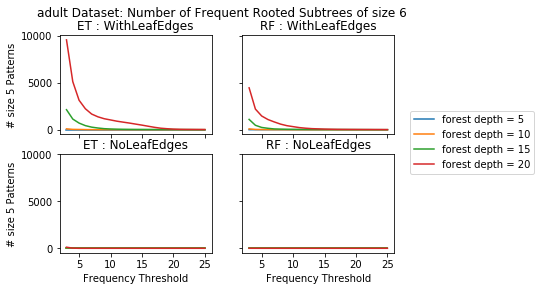

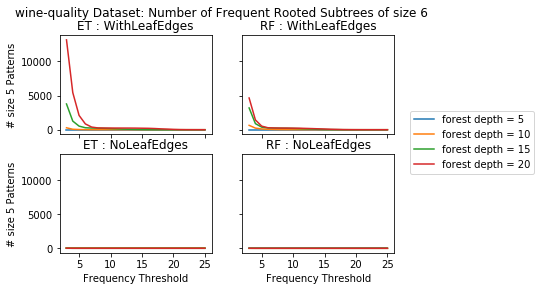

patterns of size 4


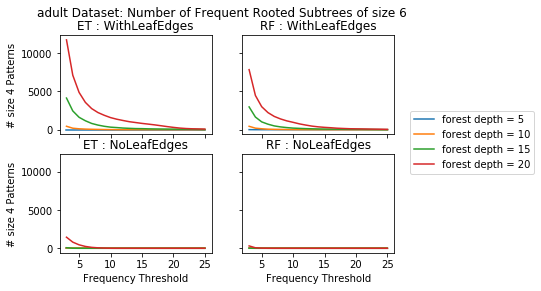

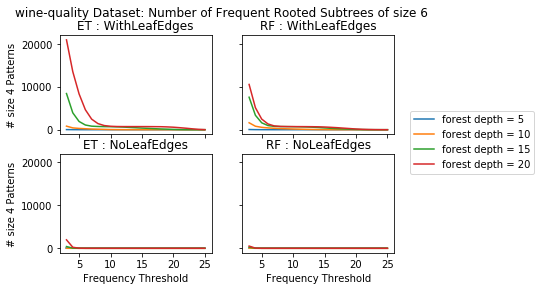

patterns of size 3


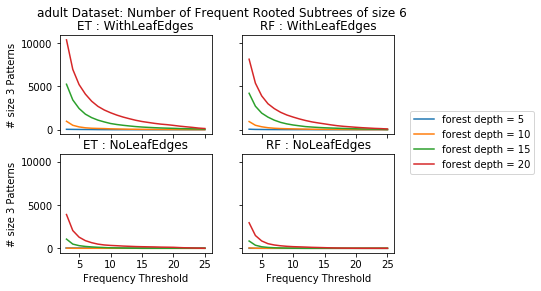

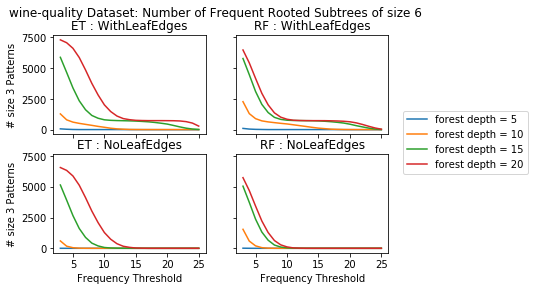

patterns of size 2


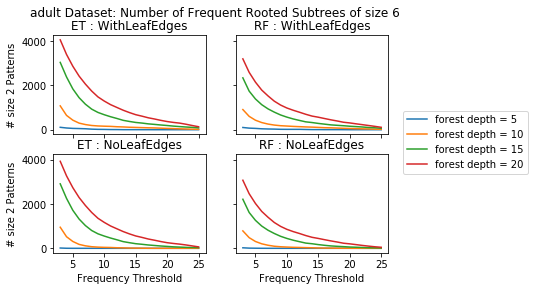

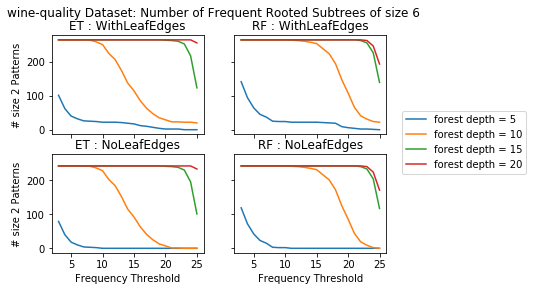

In [11]:
for patternsize in range(7,1,-1):
    print('patterns of size ' + str(patternsize))
    plotSizeXPatterns(patternsize)

In [15]:
# plot number of vertices in largest frequent subtree
for dataset in ['adult', 'wine-quality']:
    print('\n\n' + dataset + ' Dataset: Number of Frequent Rooted Subtrees of size 6 (for thresholds 2..25)')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            
            # print header
            print('\n' + forestType + ' : ' + variant)
            
            for depth in ['5', '10', '15', '20']:
                
                
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'rootedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                    # parse log file
                    try:
                        f = open(filename)
                        value = 0
                        level6 = False
                        
                        for line in f:
                            if line.startswith('Processing patterns with 6 vertices'):
                                level6 = True
                            if level6:
                                if line.startswith('frequent patterns: '):
                                    value  = int(line.split(': ')[1])
                                    break
                                    
                        f.close()
                    except:
                        print('Parsing error at ' + filename)
                        value = -1
                    values.append(value)
                        
                # print it    
                print('forest depth = ' + str(depth) + ': ' + str(values))



adult Dataset: Number of Frequent Rooted Subtrees of size 6 (for thresholds 2..25)

ET : WithLeafEdges
forest depth = 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 10: [120, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 15: [2953, 764, 351, 206, 108, 51, 27, 16, 7, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 20: [0, 5564, 2477, 1343, 901, 674, 578, 512, 435, 359, 307, 237, 166, 106, 53, 26, 14, 2, 0, 0, 0, 0, 0, 0]

RF : WithLeafEdges
forest depth = 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 10: [123, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 15: [1511, 247, 73, 24, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forest depth = 20: [0, 1678, 750, 484, 341, 221, 146, 88, 58, 39, 22, 15, 9, 7, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0]

ET : NoLeafEdges
forest depth = 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Preliminary Interpretation

Overall, very similar behavior to the undirected frequent subtree case. 
If you look at both results similarly, (i.e. this notebook and 'Results for Undirected Frequent Trees.ipynb' then you might see that

- the maximum size of rooted frequent subtrees is sometimes smaller than the maximum size of undirected frequent subtrees for identical (dataset, forestType, variant) and frequency threshold. However, there are not much less rooted frequent subtrees and the overall plots look very similar.

- the absolute number of frequent rooted subtrees is rather similar to the number of undirected frequent subtrees.
This was not completely clear: There might have been several rooted frequent trees that are different when considered as rooted trees but their underlying undirected trees are isomorphic. 
Hence, the number of frequent rooted subtrees might have been much larger than the number of undirected frequent trees.
On the other hand, the number of frequent rooted subtrees might have been much smaller:
two different rooted subtrees that are isomorphic as undirected trees can have small support, but taken together (as instances of the undirected pattern) might be frequent enough in the database.

- As was to be expected, the number of frequent trees and the maximum sizes of the frequent trees are larger in the variant where we include the leaf nodes of the decision trees.

- For large ETs and RFs (depth 15 and 20) there seem to be more large subtrees for ET than for RF. (more precisely: the Max. Freq. Tree Size tends to drop faster with the threshold for RF than for ET)

- If we look at the number of frequent rooted subtrees of size 6 (which are an interesting special case implementation-wise), there are 2 that appear in 19 of the 25 ETs of depth 20 and 17 out of 25 RFs of depth 20 in the variant with leaves on the adult dataset.

- Note that the experiment ET : WithLeafEdges and RF : WithLeafEdges for frequency threshold 2 and forest depth 20 again got killed by my system while working on frequent trees of size 5 (vertices). Hence, the strange spikes.